In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

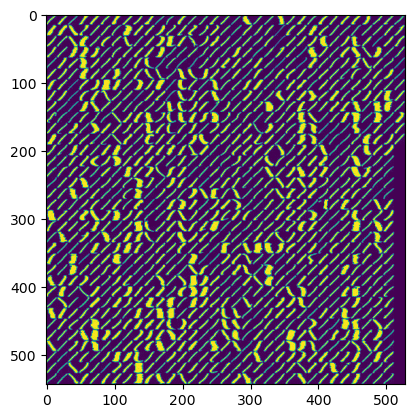

In [14]:
original_img_digit_one = plt.imread('usps_1.jpg')
plt.imshow(original_img_digit_one)

In [15]:
print(original_img_digit_one.shape)
print(type(original_img_digit_one))

(544, 528)
<class 'numpy.ndarray'>


In [16]:
row = int(original_img_digit_one.shape[0] / 16)
column = int(original_img_digit_one.shape[1] / 16)

print("r: ", row, " column: ", column)

r:  34  column:  33


(1, 256)


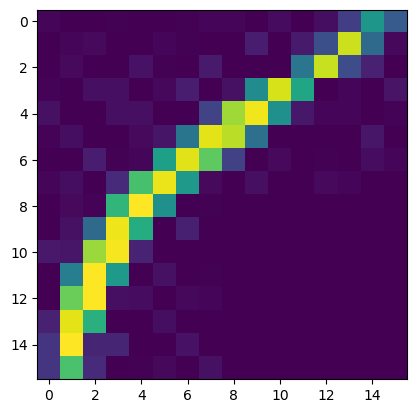

In [17]:
i = 0; j = 11; d = 16
img_digit_one = original_img_digit_one[i * d: (i + 1) * d, j * d: (j + 1) * d]
plt.imshow(img_digit_one)
print(img_digit_one.reshape(1,-1).shape)

In [18]:
d = 16
X_list = []
for i in range(row):
    for j in range(column):
        img_digit_one = original_img_digit_one[i * d: (i + 1) * d, j * d: (j + 1) * d]
        x = img_digit_one.reshape(1,-1)
        if not ((i > 11) and (j == column - 1)):
            X_list.append(x)
X = np.concatenate(X_list, axis=0)

In [19]:
def L2_norm(A, B):
    norm = 0.0
    n = len(A)

    for i in range(n):
        norm += (A[i] - B[i]) ** 2

    return norm

In [20]:
def closest_centriod(X, centroids):
    """
    Computes the centroid memberships for every example

    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): (K, n) centroids

    Returns:
        idx (array_like): (m,) closest centroids

    """
    k = centroids.shape[0]
    idx = np.zeroes(X.shape[0], dtype = int)

    for i in range(X.shape[0]):
        min_distance = math.inf
        cluster = -1
        for j in range(centroids.shape[0]):
            L2_norm = np.linalg.norm(X[i] - centroids[j])
            if L2_norm < min_distance:
                min_distance = L2_norm
                cluster = j
        idx[i] = cluster

    return idx

In [22]:
def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the
    data points assigned to each centroid.

    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each
                       example in X. Concretely, idx[i] contains the index of
                       the centroid closest to example i
        K (int):       number of centroids

    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    centroids = np.zeros((K, X.shape[1]))

    for k in range(K):
        points_cluster_k = X[idx == k]
        centroids[k] = np.mean(points_cluster_k, axis=0)

    return centroids